## Gc graph

- (import "article_neg1.gml")
- saves "nodes_df_negative.csv"
    - node, degree, centralities
- saves "Gc_negative.gml"

- (import "Gc_negative.gml")
- saves "Gc_df_negative.csv"
    - node, degree, centralities

In [1]:
# 1_network_df

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

plt.style.use('ggplot')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

#gml_files = glob('../output/network/article_neg1.gml')
#gml_files = glob('../output/network/article_pos1.gml')
gml_files = glob('../output/network/article_neu1.gml')

In [2]:
def calculate_graph_inf(graph):
    graph.name = filename
    info = nx.info(graph)
    print info
    #plt.figure(figsize=(10,10))
    #nx.draw_spring(graph, arrows=True, with_labels=True)

def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

- - -

In [3]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
combined_df = pd.DataFrame()

In [4]:
# graph = directed, ugraph = undirected
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    ugraph = graph.to_undirected() # to undirected graph
    U = graph.to_undirected(reciprocal=True)
    e = U.edges()
    ugraph.add_edges_from(e)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    calculate_graph_inf(ugraph)

    ## calculate variables and save into list
    #sent = "negative"
    #sent = "positive"
    sent = "neutral"
    
    deg_cent = nx.degree_centrality(graph)
    bet_cent = nx.betweenness_centrality(graph)
    clo_cent = nx.closeness_centrality(graph)
    graph_values = {'name':filename,
                    'sentiment':sent
                    }
    data = data.append(graph_values, ignore_index=True)

    degree = nx.degree(graph)
    deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
    deg_df.columns = ['degree']
    # degree centrality
    deg_cent = nx.degree_centrality(graph)
    dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
    dc_df.columns = ['deg cent']
    # betweenness centrality
    bet_cent = nx.betweenness_centrality(graph)
    bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
    bc_df.columns = ['bet cent']
    # closeness centrality
    clo_cent = nx.closeness_centrality(graph)
    cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
    cc_df.columns = ['clo cent']
    # concat node frames into node_df
    frames = [deg_df, dc_df, bc_df, cc_df]
    node_df = pd.concat(frames, axis = 1)
    node_df.index.name = 'node'
    node_df = node_df.reset_index()

    values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])
    
    # df = merges graph_values with node_df for single graph and fill NaNs
    df = pd.concat([values, node_df], axis = 1)
    df = df.fillna(method='ffill')
    combined_df = combined_df.append(df)

----------
../output/network/article_neu1.gml
Name: article_neu1.gml
Type: MultiDiGraph
Number of nodes: 201
Number of edges: 241
Average in degree:   1.1990
Average out degree:   1.1990
Name: article_neu1.gml
Type: MultiGraph
Number of nodes: 201
Number of edges: 241
Average degree:   2.3980


In [5]:
# what the network looks like without adding back edges e = U.edges()

#for graph_num, gml_graph in enumerate(gml_files):
#    graph2 = nx.read_gml(gml_graph)
#    ugraph2 = graph.to_undirected() # to undirected graph
#    U2 = graph.to_undirected(reciprocal=True)
#    (filepath, filename) = os.path.split(gml_graph)
#    print('-' * 10)
#    print(gml_graph)
#    calculate_graph_inf(graph2)
#    calculate_graph_inf(ugraph2)

In [6]:
# first print entire network
combined_df

#combined_df.to_csv('../output/df/nodes_df_negative.csv')

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,article_neu1.gml,neutral,7-11 year olds,2,0.010,0.000000,0.033800
1,article_neu1.gml,neutral,Alfred and Lisa Claire Dwoskin,1,0.005,0.000000,0.000000
2,article_neu1.gml,neutral,Americans,1,0.005,0.000000,0.000000
3,article_neu1.gml,neutral,Andrew Wakefield,5,0.025,0.001131,0.044138
4,article_neu1.gml,neutral,Australia,1,0.005,0.000000,0.000000
5,article_neu1.gml,neutral,Barry Segal,1,0.005,0.000000,0.032216
6,article_neu1.gml,neutral,Ben Allen,4,0.020,0.000000,0.061455
7,article_neu1.gml,neutral,CDC,4,0.020,0.004523,0.023226
8,article_neu1.gml,neutral,California,1,0.005,0.000000,0.000000
9,article_neu1.gml,neutral,Chairwoman Carol Liu,2,0.010,0.000000,0.061780


- - -

In [7]:
# 7_graph_calculation
def drawIt(graph, what = 'graph'):
    nsize = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what, nsize)
    
    if nsize > 20:
        plt.figure(figsize=(10, 10))
        if nsize > 40:
            nx.draw_spring(graph, with_labels = True, node_size = 70, font_size = 12)
        else:
            nx.draw_spring(graph, with_labels = True)
    else:
        nx.draw_spring(graph, with_labels = True)
    plt.show()

# only for undirected graphs
def describeGraph(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s nodes, %s edges, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')

# for directed graphs
def describeGraph_d(graph):
    components = sorted(nx.weakly_connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.weakly_connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s nodes, %s edges, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')


Graph has 241 nodes, 201 edges, 12 connected components

Drawing graph of size 201:


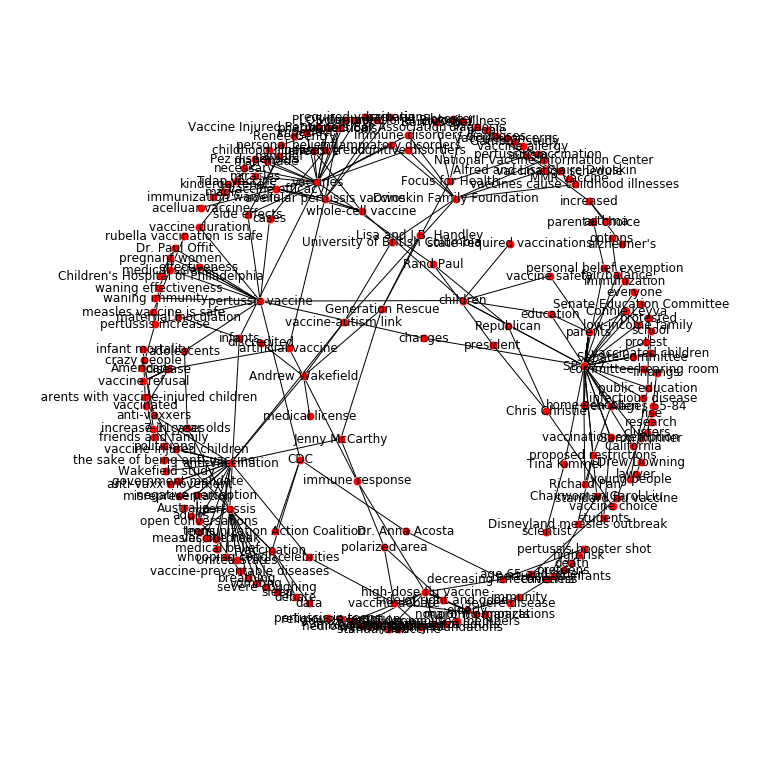

Drawing component of size 171:


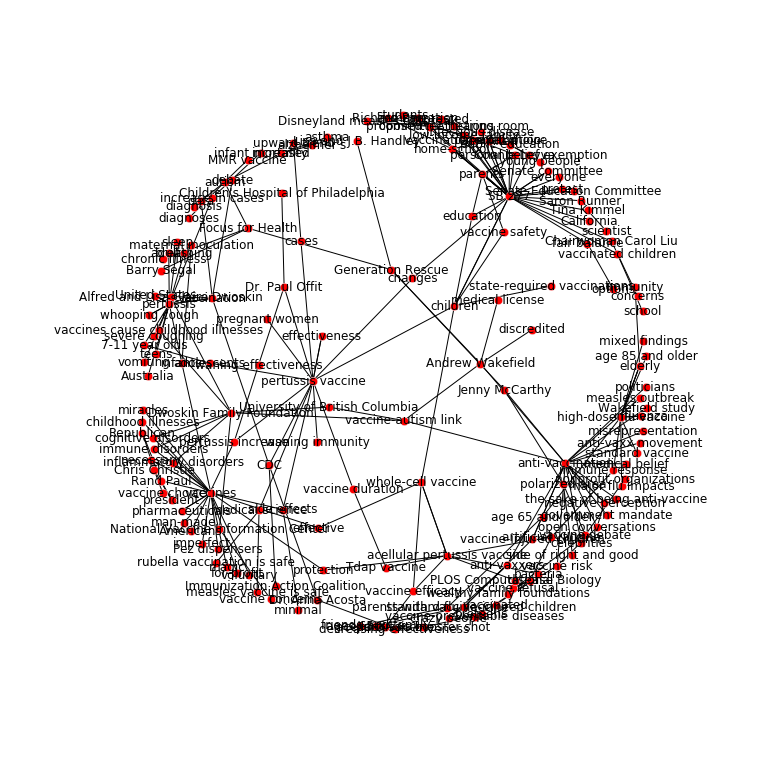

Drawing component of size 4:


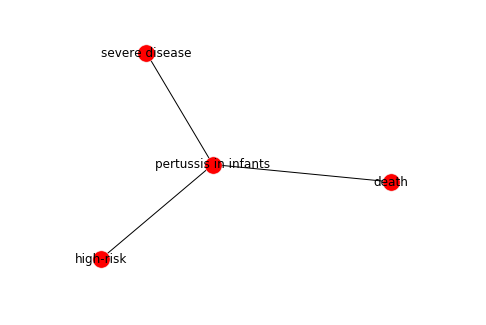

Drawing component of size 4:


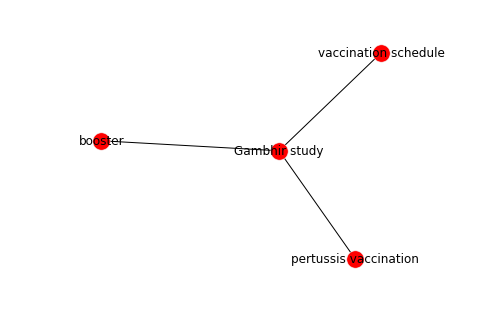

Drawing component of size 4:


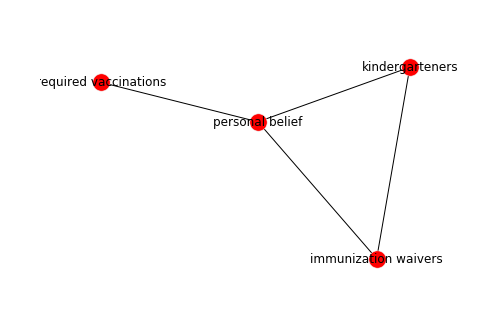

Drawing component of size 3:


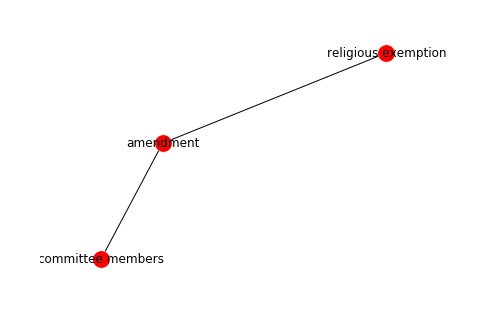

Drawing component of size 3:


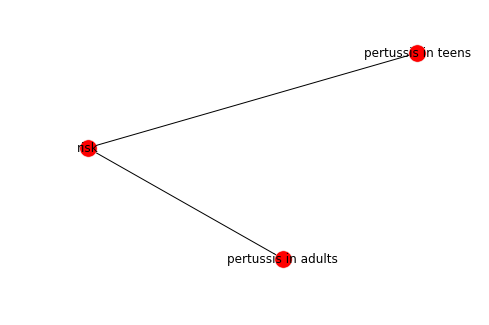

Drawing component of size 2:


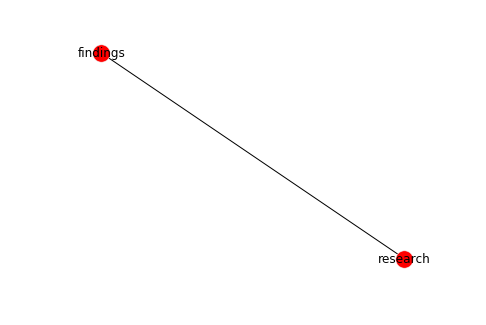

Drawing component of size 2:


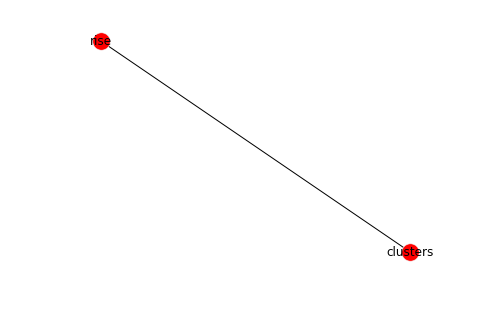

Drawing component of size 2:


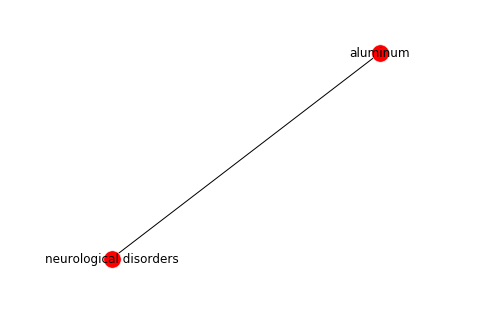

Drawing component of size 2:


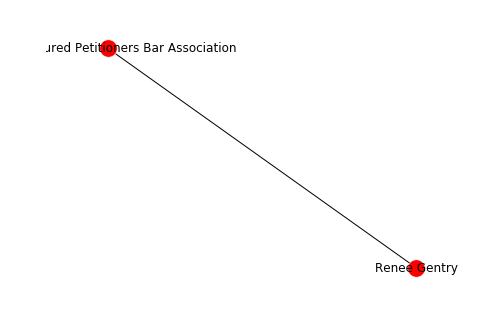

Drawing component of size 2:


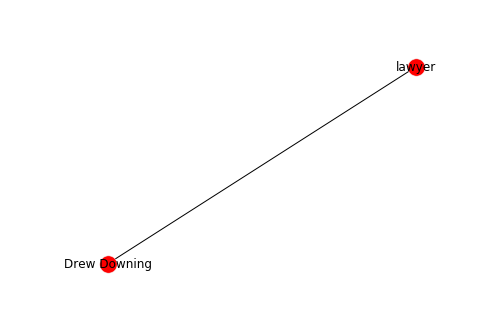

Drawing component of size 2:


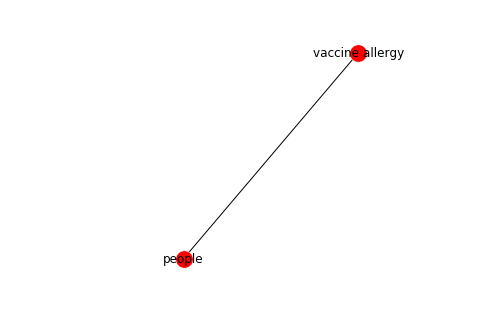

In [8]:
# undirected network graph
describeGraph(ugraph)

Graph has 241 nodes, 201 edges, 12 connected components

Drawing graph of size 201:


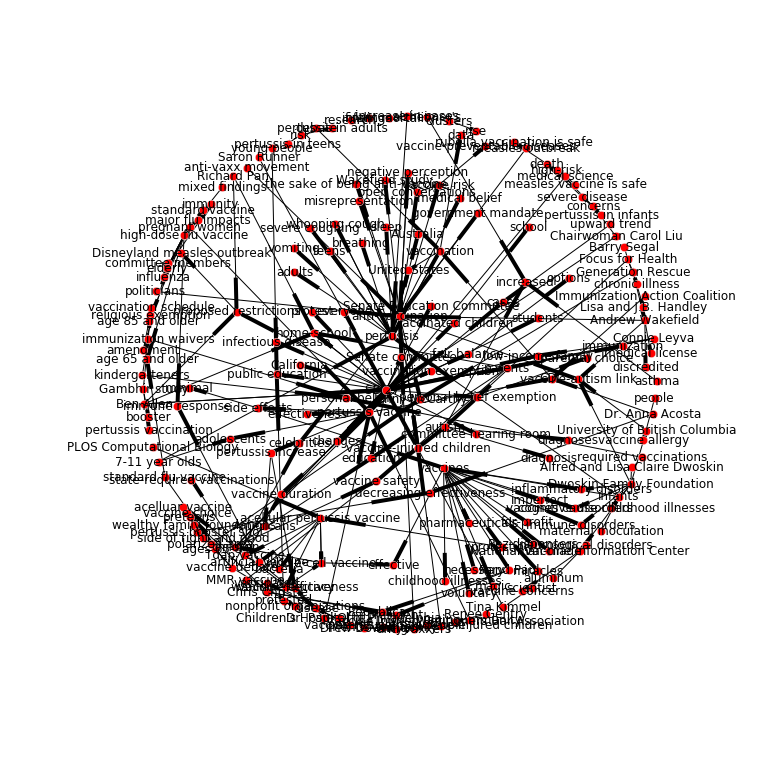

Drawing component of size 171:


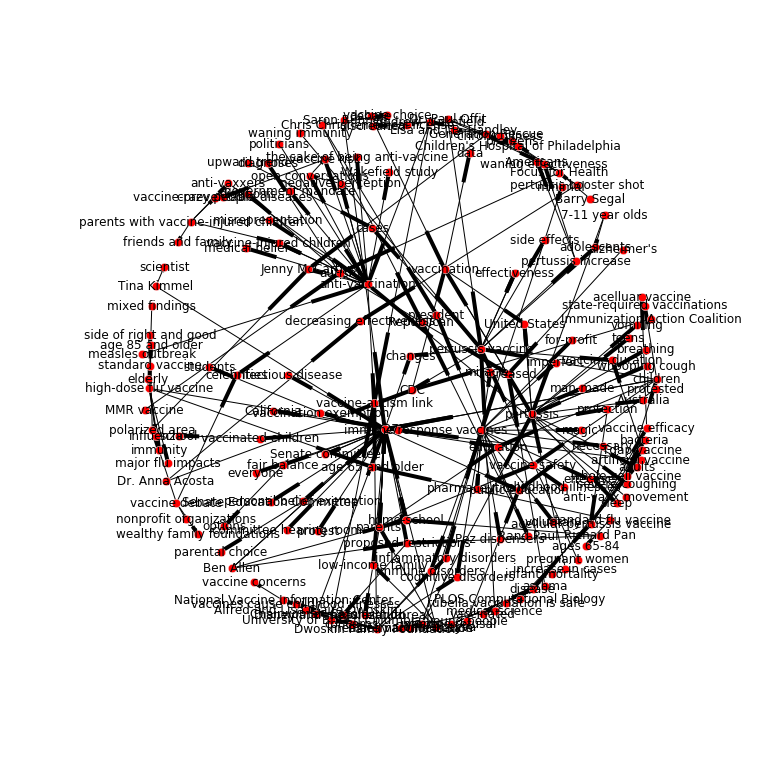

Drawing component of size 4:


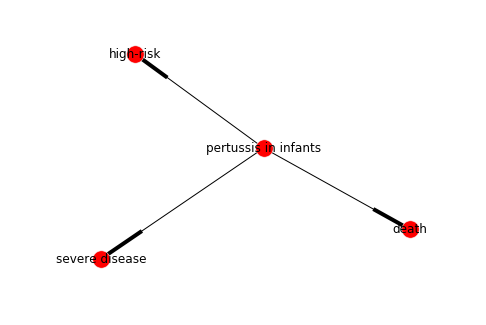

Drawing component of size 4:


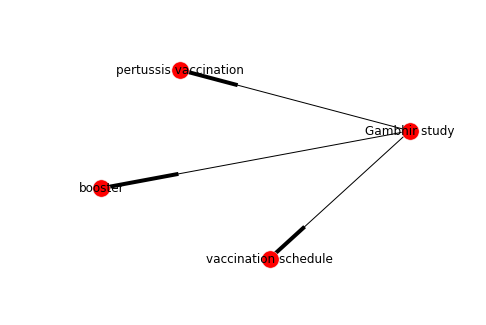

Drawing component of size 4:


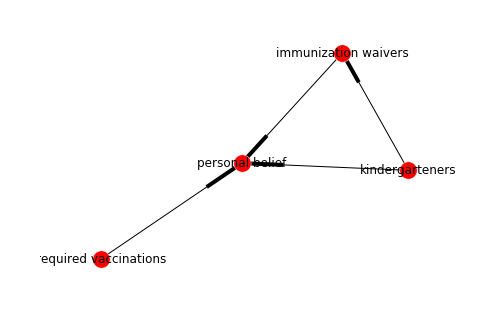

Drawing component of size 3:


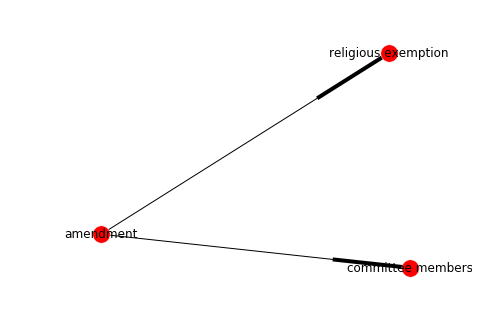

Drawing component of size 3:


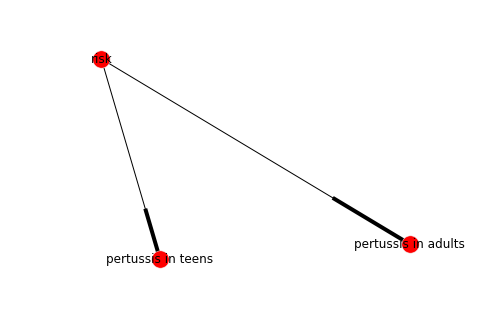

Drawing component of size 2:


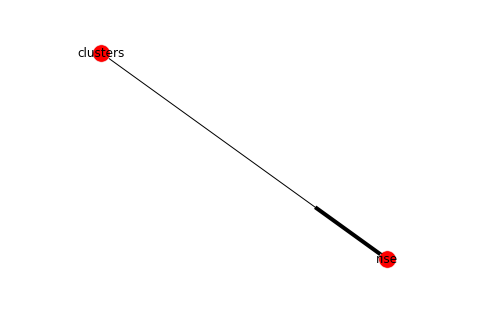

Drawing component of size 2:


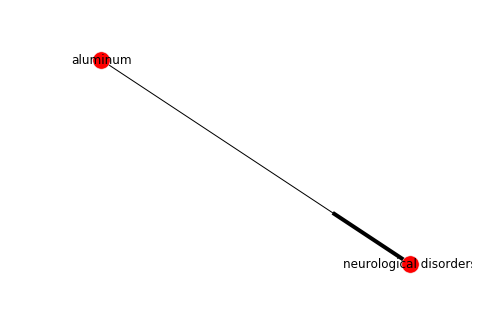

Drawing component of size 2:


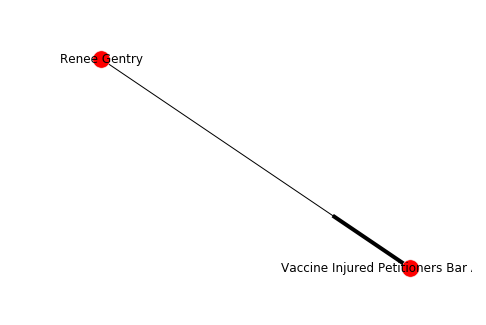

Drawing component of size 2:


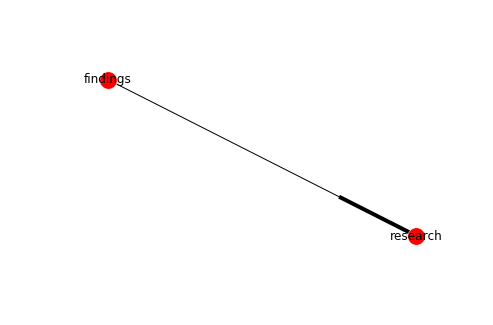

Drawing component of size 2:


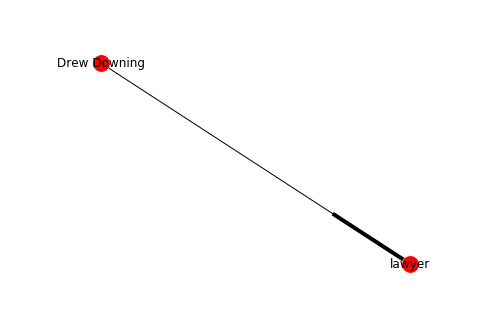

Drawing component of size 2:


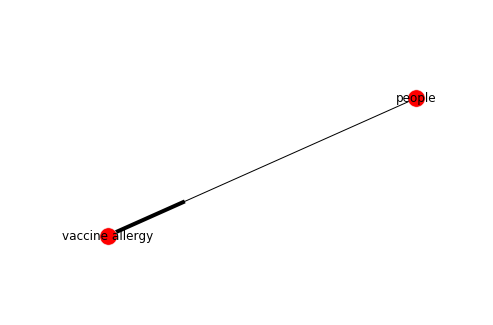

In [9]:
# directed network graph
describeGraph_d(graph)

In [10]:
# list of connected components by size (undirected graph)
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph), key=len, reverse=True)]
print "connected component sizes = ", connected_components

# generate connected components as subgraphs (undirected graph)
subgraphs = list(nx.connected_component_subgraphs(ugraph))

# greatest component (undirected; MultiGraph)
u_Gc = max(nx.connected_component_subgraphs(ugraph), key=len)
print nx.info(u_Gc)

connected component sizes =  [171, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2]
Name: article_neu1.gml
Type: MultiGraph
Number of nodes: 171
Number of edges: 221
Average degree:   2.5848


In [11]:
# use directed graph
d_Gc = max(nx.weakly_connected_component_subgraphs(graph), key=len)
print nx.info(d_Gc)

Name: article_neu1.gml
Type: MultiDiGraph
Number of nodes: 171
Number of edges: 221
Average in degree:   1.2924
Average out degree:   1.2924


In [12]:
## understand how direction changes degree ##

print nx.info(graph)  # original directed
print nx.info(ugraph)  # to undirected
temp = ugraph.to_directed()  # back to directed
print nx.info(temp)

Name: article_neu1.gml
Type: MultiDiGraph
Number of nodes: 201
Number of edges: 241
Average in degree:   1.1990
Average out degree:   1.1990
Name: article_neu1.gml
Type: MultiGraph
Number of nodes: 201
Number of edges: 241
Average degree:   2.3980
Name: article_neu1.gml
Type: MultiDiGraph
Number of nodes: 201
Number of edges: 482
Average in degree:   2.3980
Average out degree:   2.3980


In [13]:
print nx.info(u_Gc)
print nx.info(d_Gc)

Name: article_neu1.gml
Type: MultiGraph
Number of nodes: 171
Number of edges: 221
Average degree:   2.5848
Name: article_neu1.gml
Type: MultiDiGraph
Number of nodes: 171
Number of edges: 221
Average in degree:   1.2924
Average out degree:   1.2924


In [14]:
# save each Gc for each sentiment

#nx.write_gml(u_Gc, "../output/network/u_Gc_negative.gml")
#nx.write_gml(d_Gc, "../output/network/d_Gc_negative.gml")

#nx.write_gml(u_Gc, "../output/network/u_Gc_positive.gml")
#nx.write_gml(d_Gc, "../output/network/d_Gc_positive.gml")

nx.write_gml(u_Gc, "../output/network/u_Gc_neutral.gml")
nx.write_gml(d_Gc, "../output/network/d_Gc_neutral.gml")

- - -

Calculate network statistics for greatest component.

In [ ]:
#Gc_files = glob('../output/network/d_Gc_negative.gml')
#Gc_files = glob('../output/network/d_Gc_positive.gml')
#Gc_files = glob('../output/network/d_Gc_neutral.gml')

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    #'avg deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn',
                    '# conn comp',
                    'gc size'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [ ]:
# Gc_files

for graph_num, gml_graph in enumerate(Gc_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    
    # calculate variables
    sent = "negative"
    
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    #avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    conn_comp = nx.number_connected_components(graph) # ugraph
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    Gc = len(max(nx.connected_component_subgraphs(graph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    #'avg deg':avg_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con,
                    '# conn comp':conn_comp,
                    'gc size':Gc
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

In [ ]:
network_data

#network_data.to_csv('../output/df/Gc_df_negative.csv', encoding = 'utf-8')
#network_data.to_csv('../output/df/Gc_df_positive.csv', encoding = 'utf-8')
#network_data.to_csv('../output/df/Gc_df_neutral.csv', encoding = 'utf-8')

- - -

In [ ]:
# returns all minimum k cutsets of an undirected graph
# i.e., the set(s) of nodes of cardinality equal to the node connectivity of G
# thus if removed, would break G into two or more connected components
cutsets = list(nx.all_node_cuts(Gc))

print "Connected components =", connected_components
print "Greatest component size =", len(Gc)
print "# of cutsets =", len(cutsets)

# returns a set of nodes or edges of minimum cardinality that disconnects G
min_ncut = nx.minimum_node_cut(Gc)
min_ecut = nx.minimum_edge_cut(Gc)

print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

# min cuts with source and target
print nx.minimum_node_cut(Gc, s='vaccines', t='autism')
print nx.minimum_edge_cut(Gc, s='vaccines', t='autism')

In [ ]:
# read edge labels in min cut for Gc
# change source and target
a = nx.minimum_edge_cut(Gc, s='vaccines', t='autism')
#a = nx.minimum_edge_cut(Gc)

labels = nx.get_edge_attributes(Gc,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in a:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

- - -

In [ ]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df